## load features

In [1]:
# matrix feature
import numpy as np
import pandas as pd

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# scaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# data preperation
from sklearn.decomposition import PCA

#for image saving
from PIL import Image

## load data

In [2]:
dfN = pd.read_csv('df.csv', index_col=0)
XtrainN = pd.read_csv('Xtrain.csv', index_col=0)
#XtestN = pd.read_csv('Xtest.csv', index_col=0)
ytrain = pd.read_csv('ytrain.csv',dtype=int, index_col=0)
#ytest = pd.read_csv('ytest.csv', index_col=0)
df_trainN = XtrainN.merge(ytrain, left_index=True, right_index=True, how='left')


In [3]:
XtrainN.shape,  ytrain.shape, dfN.shape #, ytest.shape,Xtest.shape,

((32, 88), (32, 1), (41, 89))

In [4]:
#def minmaxscaler(df):
#    pass

In [5]:
# instantiate standard scaler 
scale = StandardScaler()

In [6]:
# fit and transform training data
Xtrain_scale = scale.fit_transform(XtrainN)

## PCA

In [7]:
pca = PCA()

In [8]:
pca.fit(Xtrain_scale)

PCA()

In [9]:
pca.n_components_

32

In [10]:
# explained variance ratio
evr = pd.DataFrame(
    data=pca.explained_variance_ratio_,
    #index=Xtrain_scale.columns,
    columns=['explained_variance_ratio']
)
evr

,explained_variance_ratio
0,3.319203e-01
1,1.564238e-01
2,1.061660e-01
3,7.496373e-02
4,7.032537e-02
5,4.883756e-02
6,4.297167e-02
7,2.840980e-02
8,2.532089e-02
9,2.030998e-02


In [11]:
evr['pixels'] = evr['explained_variance_ratio'].apply(lambda x: round(x*224))

In [12]:
evr.head()

,explained_variance_ratio,pixels
0,0.331920,74
1,0.156424,35
2,0.106166,24
3,0.074964,17
4,0.070325,16


In [13]:
evr.tail()

,explained_variance_ratio,pixels
27,4.961610e-04,0
28,3.798725e-04,0
29,3.292298e-04,0
30,2.175860e-04,0
31,2.442593e-33,0


In [14]:
evr['pixels'].sum()

223

In [15]:
evr = evr[evr['pixels']>0]

In [16]:
N=evr.shape[0]

In [17]:
#xtransorm week10 pca

In [18]:
T_pca = pca.transform(Xtrain_scale)
T_pca

array([[ 8.82049868e+00, -8.35251354e-01, -1.19231558e-01, ...,
        -6.21482908e-02, -7.51616452e-02, -8.82658372e-16],
       [-3.31742933e+00,  2.04953126e+00, -2.28521527e+00, ...,
        -2.40607968e-01,  1.40126177e-01, -1.47725349e-15],
       [-3.89180016e+00,  1.22707765e+00,  3.91731867e+00, ...,
        -2.07385371e-02, -1.50335964e-02,  6.47842094e-15],
       ...,
       [-4.71877743e+00, -2.90491779e+00,  3.97118231e+00, ...,
         5.91001378e-02,  2.13238232e-01,  3.80783614e-16],
       [ 7.50641282e-01,  2.28151347e+00,  8.68539960e-02, ...,
        -2.37554567e-01,  1.37999983e-01,  1.03312351e-15],
       [-1.01517346e+01,  3.36917096e+00,  2.25519121e+00, ...,
         1.41052713e-01,  6.14679432e-02,  1.05530689e-15]])

In [19]:
T_pca = pd.DataFrame(T_pca)

In [20]:
from sklearn import set_config
set_config(transform_output="pandas")

In [21]:
T_pca2 = T_pca[T_pca.columns[:N]]
T_pca2

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,8.820499,-0.835251,-0.119232,2.266283,-0.288600,3.251476,1.509832,0.143065,2.485991,1.497173,...,3.265869,-0.429244,0.602725,1.721225,0.633117,0.339510,0.344015,-0.551161,-0.359579,0.580239
1,-3.317429,2.049531,-2.285215,2.852286,5.060410,-0.196289,-1.099486,0.901807,1.390484,-0.127154,...,-0.390525,-0.200057,-0.111518,-0.048281,0.629286,-0.304506,0.330577,-0.324115,0.695981,-0.625004
2,-3.891800,1.227078,3.917319,0.930396,-3.422362,-0.832288,0.865889,-1.011010,-2.175632,1.567663,...,1.277301,-0.691109,-0.465725,1.147840,-0.357596,-1.217414,-0.453844,1.161483,1.163349,-0.036080
3,-9.067622,4.111548,-0.310883,-1.473755,0.453501,-0.168713,-1.455866,0.075805,-1.274871,1.609878,...,-0.110881,0.557988,0.681457,1.747979,-1.167788,0.845516,-0.075286,-0.994864,-0.165759,-0.621378
4,10.580527,5.378272,-2.115125,-2.263860,-4.645193,2.214343,1.756578,1.638636,1.100046,3.186178,...,-1.446673,1.144963,-0.960931,-1.410266,0.069290,0.470478,0.527157,0.089556,0.398116,-0.254877
5,4.785918,-6.631912,1.158293,-4.029729,5.526404,-0.137098,1.671390,0.533781,-2.318122,1.779227,...,-1.843959,-1.041117,-0.861423,0.876661,1.612044,0.510551,-0.301199,-0.051617,0.563103,0.189016
6,-1.294278,-5.262196,4.415107,2.852478,-2.978185,-1.116989,0.207777,0.055762,0.003238,-0.692952,...,-1.005518,0.039755,0.787849,-0.229468,-0.646207,1.474508,0.337319,0.099895,0.417595,-0.887288
7,7.263660,-0.292689,4.171129,1.245287,3.854864,-0.811003,-4.610258,-0.419734,-1.191109,2.100965,...,0.963072,0.419204,2.467398,-1.568071,0.106339,-0.101063,-0.677205,0.335554,-0.292249,-0.026377
8,-7.221586,1.005748,-3.919946,-0.656920,1.494549,-0.614670,-0.969095,1.009204,-0.475032,-1.439407,...,0.786315,0.112683,-0.720025,-0.867887,0.970146,0.172806,0.892419,0.465393,-0.409734,0.063876
9,-2.176986,-2.051091,-5.356994,0.727778,2.986543,-1.456632,0.496438,0.029475,1.026449,0.146871,...,0.855358,1.036943,-1.391462,0.254127,0.245186,-0.211458,-0.788733,0.335943,-0.212139,-0.446253


In [22]:
mm_scaler = MinMaxScaler()

In [23]:
T_pca2 = mm_scaler.fit_transform(T_pca2)
T_pca3 = pd.DataFrame(T_pca2 )
T_pca3.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20
0,0.886421,0.408958,0.455825,0.655016,0.446362,0.732550,0.570748,0.415962,0.828621,0.726036,...,1.000000,0.330105,0.555524,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
1,0.319312,0.572269,0.267326,0.705862,0.955633,0.406163,0.327408,0.504522,0.667295,0.462563,...,0.321792,0.383123,0.385272,0.458314,0.676953,0.339129,0.533453,0.304132,0.721441,0.191601
2,0.292477,0.525709,0.807112,0.539104,0.148002,0.345955,0.510695,0.281258,0.142143,0.737470,...,0.631149,0.269528,0.300841,0.819020,0.352551,0.000000,0.222016,0.977734,0.957188,0.456008
3,0.050652,0.689001,0.439146,0.330502,0.517017,0.408773,0.294173,0.408111,0.274790,0.744317,...,0.373662,0.558480,0.574291,1.000000,0.086229,0.766341,0.372314,0.000000,0.286767,0.193229
4,0.968653,0.760712,0.282129,0.261947,0.031578,0.634368,0.593759,0.590525,0.624525,1.000000,...,0.125892,0.694263,0.182801,0.047588,0.492874,0.627021,0.611500,0.491699,0.571193,0.357776


In [24]:
row0 = T_pca2[0:0]


In [25]:
evr['pixels']

0     74
1     35
2     24
3     17
4     16
5     11
6     10
7      6
8      6
9      5
10     3
11     3
12     3
13     2
14     2
15     1
16     1
17     1
18     1
19     1
20     1
Name: pixels, dtype: int64

In [26]:
rowt

NameError: name 'rowt' is not defined

In [ ]:
row1 = T_pca2[1]
row0[2]

0.4558245212497653

74
[0, 0.31931240592667165]
[0, 0.31931240592667165, 0.31931240592667165]
[0, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165]
[0, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165]
[0, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165]
[0, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165]
[0, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165]
[0, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165]
[0, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165, 0.31931240592667165]
[0, 0.3193124059

C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\3897774383.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


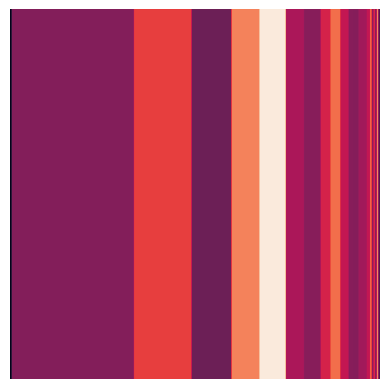

In [ ]:
img=[0]
k=0
for i in evr['pixels']:
    print(i)
    j=0
    while j < i:
        img.append(row1[k])
        print(img)
        j=j+1
    
    k=k+1
        
dfi =[]
dfi = pd.DataFrame(img)

for s in range(0,224):
        dfi[s]= pd.DataFrame(img)
    
dfi = dfi.T

plt.imshow(dfi)
plt.axis('off')
plt.show()

In [ ]:
new_image_255

array([[[  0,   0,   0],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [ 51,  51,  51],
        [ 48,  48,  48],
        [187, 187, 187]],

       [[  0,   0,   0],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [ 51,  51,  51],
        [ 48,  48,  48],
        [187, 187, 187]],

       [[  0,   0,   0],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [ 51,  51,  51],
        [ 48,  48,  48],
        [187, 187, 187]],

       ...,

       [[  0,   0,   0],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [ 51,  51,  51],
        [ 48,  48,  48],
        [187, 187, 187]],

       [[  0,   0,   0],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [ 51,  51,  51],
        [ 48,  48,  48],
        [187, 187, 187]],

       [[  0,   0,   0],
        [226, 226, 226],
        [226, 226, 226],
        ...,
        [ 51,  51,  51],
        [ 48,  48,  48],
        [187, 187, 187]]

In [ ]:
def rowtoimage(row_, evr, name, y):

    '''
    function takes a row and adds the values multiple time to a new data frame. 
    The amount is written the an evr series. Afterwards it copies this column 224 times, 
    so an 224x224 image is created. Additional 3 coppied layers. Saves image as csv in given folder
    '''
    img=[0]
    k=0
    for i in evr:
        #range(0,len(T_pca2[0])):
        j=0
        while j <= i-1:
            img.append(row_[k])
            j=j+1
        #print(T_pca2[0,0])
        k=k+1
        
    dfi =[]
    dfi = pd.DataFrame(img)

    for s in range(0,224):
        dfi[s]= pd.DataFrame(img)
    
    dfi = dfi.T
    #new_image with colors 0-255
    dfi = (dfi * 255).round().astype(np.uint8)
    dfi = np.stack([dfi.values] * 3, axis=-1) #NEU

   
    name = str(y)+'/pic'+ str(name) + '.jpg'

    #np.savetxt(name, dfi, delimiter=',') #SPEICHERN

    #dfi.to_csv(name, index=True)
    #dfi.save('bild1.jpg')
    #new_image_255 = (dfi * 255).round().astype(np.uint8)
    #dfi.save(name)

    image = Image.fromarray(dfi)

    # Bild als JPEG speichern
    image.save(name)

    print(dfi)
    return dfi

[[[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 ...

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\3666254476.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


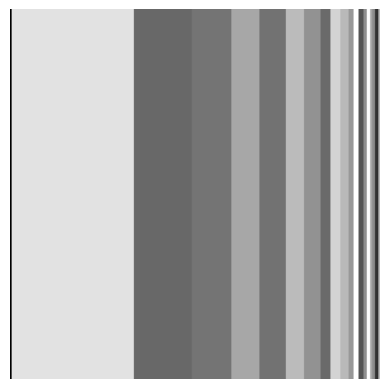

In [ ]:
new_image = rowtoimage(row0,evr['pixels'],1,0)
#new_image_255 = (new_image * 255).round().astype(np.uint8)
#image = new_image_255.fromarray(new_image_255)
# Bild als JPEG speichern
#image.save('bild10.jpg')
#new_image.save('bild1000.jpg')

#print(new_image_255)
image = Image.fromarray(new_image)

# Bild als JPEG speichern
image.save('bild10000.jpg')

plt.imshow(new_image)
plt.axis('off')
plt.show()

In [ ]:
# Beispiel Array mit Farbwerten im Bereich von 0 bis 1
#new_image_255 = np.random.rand(224, 224, 3)  # Annahme eines zufälligen Arrays

# Umrechnung der Farbwerte von 0 bis 1 auf 0 bis 255
#new_image_255 = (new_image_255 * 255).round().astype(np.uint8)

# Array in ein PIL-Bild konvertieren
image = Image.fromarray(new_image_255)

# Bild als JPEG speichern
image.save('bild10.jpg')

In [ ]:
pic

,0,1,2,3,4,5,6,7,8,9,...,214,215,216,217,218,219,220,221,222,223
0,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
1,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
2,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
3,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
4,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
219,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
220,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
221,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714
222,0.0,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,0.886421,...,0.555524,0.555524,0.991932,0.991932,0.678212,0.578369,0.538788,0.201184,0.189001,0.732714


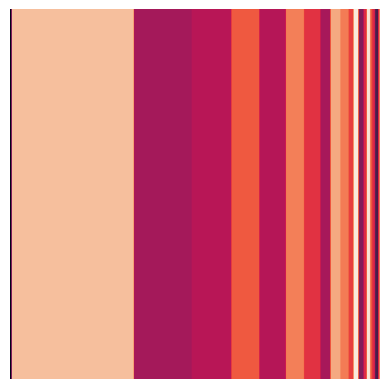

In [ ]:
pic = pd.read_csv("pic1.csv", header=None)
plt.imshow(pic)
plt.axis('off')
plt.show()

In [ ]:
''' old, now in function
img=[0]
k=0
for i in evr['pixels']:
#   range(0,len(T_pca2[0])):
    j=0
    while j <= i-1:
        img.append(T_pca2[0,k])
        j=j+1
    #print(T_pca2[0,0])
    k=k+1


df =[]
df = pd.DataFrame(img)
for s in range(0,224):
    df[s]= pd.DataFrame(img)

image_data = np.stack([df.values] * 3, axis=-1)
image_data
'''


" old, now in function\nimg=[0]\nk=0\nfor i in evr['pixels']:\n#   range(0,len(T_pca2[0])):\n    j=0\n    while j <= i-1:\n        img.append(T_pca2[0,k])\n        j=j+1\n    #print(T_pca2[0,0])\n    k=k+1\n\n\ndf =[]\ndf = pd.DataFrame(img)\nfor s in range(0,224):\n    df[s]= pd.DataFrame(img)\n\nimage_data = np.stack([df.values] * 3, axis=-1)\nimage_data\n"

In [ ]:
#T_pca2['pixel_list'] = list(evr['pixels'])

# multiply every element of first row by weight factor of the list above to create a row ~224
#copy this row 224 times
#create 3 layers of same image
#x same for next row -> 32 images (224x224x3)


In [ ]:
XtrainN.head()

,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87
measurement,,,,,,,,,,,,,,,,,,,,,
21,11.000000,-28.333333,-5.000000,12.000000,1.333333,0.333333,16.333333,10.333333,75.000000,66.666667,...,-5.666667,-4.000000,-5.666667,1.666667,-0.333333,28.333333,269.666667,2164.333333,2890.000000,1.666667
17,9.666667,-7.333333,15.000000,3.000000,-3.666667,-3.000000,1.000000,1.333333,-12.333333,-22.333333,...,-19.666667,-2.666667,-10.000000,-6.000000,-2.666667,10.333333,37.000000,-123.333333,84.666667,-3.333333
36,-6.333333,-22.000000,-8.666667,2.333333,-2.000000,-1.333333,0.333333,0.333333,-8.333333,-23.000000,...,-28.666667,7.333333,4.333333,-3.666667,0.666667,-28.000000,18.000000,-460.000000,-190.666667,0.333333
31,-2.000000,-4.666667,13.666667,-6.333333,-6.000000,-6.333333,-3.666667,-5.000000,-30.333333,-68.000000,...,-8.000000,-4.000000,-4.000000,-7.000000,-4.000000,-32.666667,-76.333333,-1535.000000,-57.666667,-1.333333
33,12.666667,-60.333333,-2.333333,-4.333333,0.333333,-3.333333,18.666667,9.000000,19.333333,-8.666667,...,-39.000000,-0.666667,-8.333333,3.666667,-4.000000,50.000000,324.666667,2552.666667,2827.666667,7.000000


In [ ]:
df_trainN.iloc[0]

p0       11.000000
p1      -28.333333
p2       -5.000000
p3       12.000000
p4        1.333333
          ...     
p84     269.666667
p85    2164.333333
p86    2890.000000
p87       1.666667
y         0.000000
Name: 21, Length: 89, dtype: float64

In [ ]:
df_trainN.iloc[0]['y'].astype(int)

0

In [ ]:
yt = [element for row in ytrain.values for element in row]
yt[1]


1

0     0.886421
1     0.408958
2     0.455825
3     0.655016
4     0.446362
5     0.732550
6     0.570748
7     0.415962
8     0.828621
9     0.726036
10    0.597670
11    1.000000
12    0.330105
13    0.555524
14    0.991932
15    0.678212
16    0.578369
17    0.538788
18    0.201184
19    0.189001
20    0.732714
Name: 0, dtype: float64
[[[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 ...

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]

 [[  0   0   0]
  [226 226 226]
  [226 226 226]
  ...
  [ 51  51  51]
  [ 48  48  48]
  [187 187 187]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


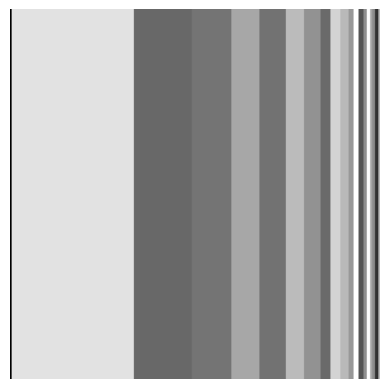

C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


0     0.319312
1     0.572269
2     0.267326
3     0.705862
4     0.955633
5     0.406163
6     0.327408
7     0.504522
8     0.667295
9     0.462563
10    0.325000
11    0.321792
12    0.383123
13    0.385272
14    0.458314
15    0.676953
16    0.339129
17    0.533453
18    0.304132
19    0.721441
20    0.191601
Name: 1, dtype: float64
[[[  0   0   0]
  [ 81  81  81]
  [ 81  81  81]
  ...
  [ 78  78  78]
  [184 184 184]
  [ 49  49  49]]

 [[  0   0   0]
  [ 81  81  81]
  [ 81  81  81]
  ...
  [ 78  78  78]
  [184 184 184]
  [ 49  49  49]]

 [[  0   0   0]
  [ 81  81  81]
  [ 81  81  81]
  ...
  [ 78  78  78]
  [184 184 184]
  [ 49  49  49]]

 ...

 [[  0   0   0]
  [ 81  81  81]
  [ 81  81  81]
  ...
  [ 78  78  78]
  [184 184 184]
  [ 49  49  49]]

 [[  0   0   0]
  [ 81  81  81]
  [ 81  81  81]
  ...
  [ 78  78  78]
  [184 184 184]
  [ 49  49  49]]

 [[  0   0   0]
  [ 81  81  81]
  [ 81  81  81]
  ...
  [ 78  78  78]
  [184 184 184]
  [ 49  49  49]]]


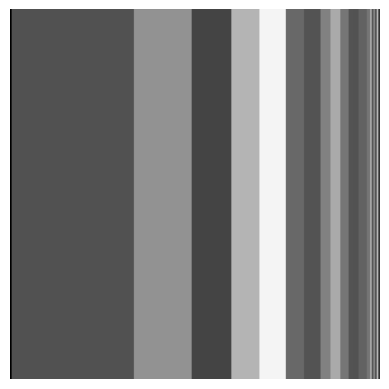

0     0.292477
1     0.525709
2     0.807112
3     0.539104
4     0.148002
5     0.345955
6     0.510695
7     0.281258
8     0.142143
9     0.737470
10    0.304584
11    0.631149
12    0.269528
13    0.300841
14    0.819020
15    0.352551
16    0.000000
17    0.222016
18    0.977734
19    0.957188
20    0.456008
Name: 2, dtype: float64
[[[  0   0   0]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [249 249 249]
  [244 244 244]
  [116 116 116]]

 [[  0   0   0]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [249 249 249]
  [244 244 244]
  [116 116 116]]

 [[  0   0   0]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [249 249 249]
  [244 244 244]
  [116 116 116]]

 ...

 [[  0   0   0]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [249 249 249]
  [244 244 244]
  [116 116 116]]

 [[  0   0   0]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [249 249 249]
  [244 244 244]
  [116 116 116]]

 [[  0   0   0]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [249 249 249]
  [244 244 244]
  [116 116 116]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


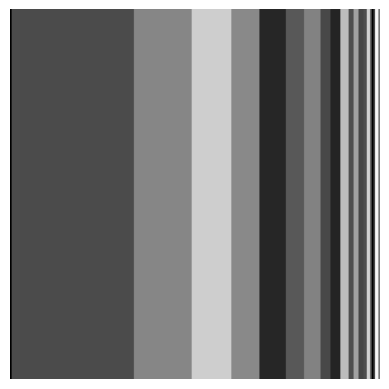

0     0.050652
1     0.689001
2     0.439146
3     0.330502
4     0.517017
5     0.408773
6     0.294173
7     0.408111
8     0.274790
9     0.744317
10    0.064994
11    0.373662
12    0.558480
13    0.574291
14    1.000000
15    0.086229
16    0.766341
17    0.372314
18    0.000000
19    0.286767
20    0.193229
Name: 3, dtype: float64


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


[[[ 0  0  0]
  [13 13 13]
  [13 13 13]
  ...
  [ 0  0  0]
  [73 73 73]
  [49 49 49]]

 [[ 0  0  0]
  [13 13 13]
  [13 13 13]
  ...
  [ 0  0  0]
  [73 73 73]
  [49 49 49]]

 [[ 0  0  0]
  [13 13 13]
  [13 13 13]
  ...
  [ 0  0  0]
  [73 73 73]
  [49 49 49]]

 ...

 [[ 0  0  0]
  [13 13 13]
  [13 13 13]
  ...
  [ 0  0  0]
  [73 73 73]
  [49 49 49]]

 [[ 0  0  0]
  [13 13 13]
  [13 13 13]
  ...
  [ 0  0  0]
  [73 73 73]
  [49 49 49]]

 [[ 0  0  0]
  [13 13 13]
  [13 13 13]
  ...
  [ 0  0  0]
  [73 73 73]
  [49 49 49]]]


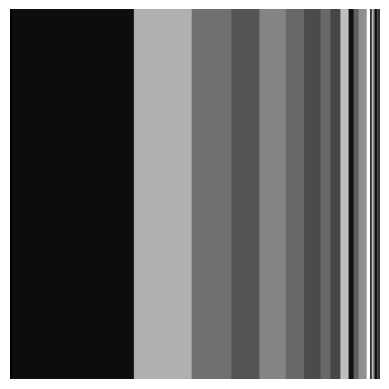

0     0.968653
1     0.760712
2     0.282129
3     0.261947
4     0.031578
5     0.634368
6     0.593759
7     0.590525
8     0.624525
9     1.000000
10    0.201986
11    0.125892
12    0.694263
13    0.182801
14    0.047588
15    0.492874
16    0.627021
17    0.611500
18    0.491699
19    0.571193
20    0.357776
Name: 4, dtype: float64
[[[  0   0   0]
  [247 247 247]
  [247 247 247]
  ...
  [125 125 125]
  [146 146 146]
  [ 91  91  91]]

 [[  0   0   0]
  [247 247 247]
  [247 247 247]
  ...
  [125 125 125]
  [146 146 146]
  [ 91  91  91]]

 [[  0   0   0]
  [247 247 247]
  [247 247 247]
  ...
  [125 125 125]
  [146 146 146]
  [ 91  91  91]]

 ...

 [[  0   0   0]
  [247 247 247]
  [247 247 247]
  ...
  [125 125 125]
  [146 146 146]
  [ 91  91  91]]

 [[  0   0   0]
  [247 247 247]
  [247 247 247]
  ...
  [125 125 125]
  [146 146 146]
  [ 91  91  91]]

 [[  0   0   0]
  [247 247 247]
  [247 247 247]
  ...
  [125 125 125]
  [146 146 146]
  [ 91  91  91]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


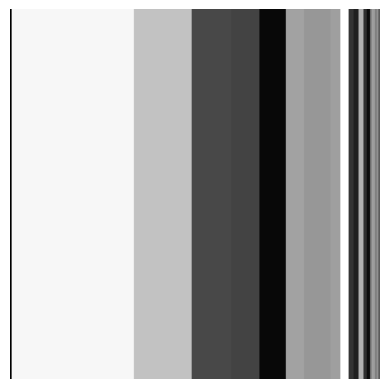

0     0.697917
1     0.080804
2     0.567003
3     0.108727
4     1.000000
5     0.411766
6     0.585815
7     0.461566
8     0.121160
9     0.771786
10    0.665755
11    0.052201
12    0.188562
13    0.206520
14    0.737242
15    1.000000
16    0.641908
17    0.282620
18    0.427688
19    0.654415
20    0.557068
Name: 5, dtype: float64
[[[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [109 109 109]
  [167 167 167]
  [142 142 142]]

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [109 109 109]
  [167 167 167]
  [142 142 142]]

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [109 109 109]
  [167 167 167]
  [142 142 142]]

 ...

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [109 109 109]
  [167 167 167]
  [142 142 142]]

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [109 109 109]
  [167 167 167]
  [142 142 142]]

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [109 109 109]
  [167 167 167]
  [142 142 142]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


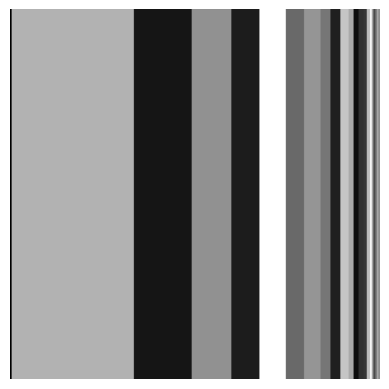

0     0.413838
1     0.158345
2     0.850432
3     0.705878
4     0.190291
5     0.319004
6     0.449321
7     0.405772
8     0.463007
9     0.370788
10    0.774742
11    0.207720
12    0.438598
13    0.599652
14    0.403674
15    0.257680
16    1.000000
17    0.536130
18    0.496387
19    0.581019
20    0.073845
Name: 6, dtype: float64


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


[[[  0   0   0]
  [106 106 106]
  [106 106 106]
  ...
  [127 127 127]
  [148 148 148]
  [ 19  19  19]]

 [[  0   0   0]
  [106 106 106]
  [106 106 106]
  ...
  [127 127 127]
  [148 148 148]
  [ 19  19  19]]

 [[  0   0   0]
  [106 106 106]
  [106 106 106]
  ...
  [127 127 127]
  [148 148 148]
  [ 19  19  19]]

 ...

 [[  0   0   0]
  [106 106 106]
  [106 106 106]
  ...
  [127 127 127]
  [148 148 148]
  [ 19  19  19]]

 [[  0   0   0]
  [106 106 106]
  [106 106 106]
  ...
  [127 127 127]
  [148 148 148]
  [ 19  19  19]]

 [[  0   0   0]
  [106 106 106]
  [106 106 106]
  ...
  [127 127 127]
  [148 148 148]
  [ 19  19  19]]]


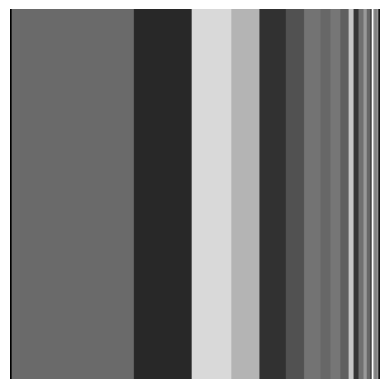

0     0.813682
1     0.439673
2     0.829200
3     0.566427
4     0.840855
5     0.347970
6     0.000000
7     0.350272
8     0.287125
9     0.823974
10    0.307184
11    0.572864
12    0.526375
13    1.000000
14    0.000000
15    0.505053
16    0.414704
17    0.133335
18    0.603240
19    0.222963
20    0.460364
Name: 7, dtype: float64
[[[  0   0   0]
  [207 207 207]
  [207 207 207]
  ...
  [154 154 154]
  [ 57  57  57]
  [117 117 117]]

 [[  0   0   0]
  [207 207 207]
  [207 207 207]
  ...
  [154 154 154]
  [ 57  57  57]
  [117 117 117]]

 [[  0   0   0]
  [207 207 207]
  [207 207 207]
  ...
  [154 154 154]
  [ 57  57  57]
  [117 117 117]]

 ...

 [[  0   0   0]
  [207 207 207]
  [207 207 207]
  ...
  [154 154 154]
  [ 57  57  57]
  [117 117 117]]

 [[  0   0   0]
  [207 207 207]
  [207 207 207]
  ...
  [154 154 154]
  [ 57  57  57]
  [117 117 117]]

 [[  0   0   0]
  [207 207 207]
  [207 207 207]
  ...
  [154 154 154]
  [ 57  57  57]
  [117 117 117]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


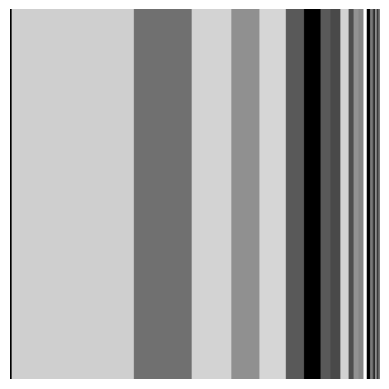

0     0.136902
1     0.513179
2     0.125061
3     0.401377
4     0.616133
5     0.366556
6     0.339568
7     0.517057
8     0.392576
9     0.249710
10    0.327620
11    0.540079
12    0.455468
13    0.240225
14    0.211150
15    0.788999
16    0.516442
17    0.756520
18    0.662111
19    0.163702
20    0.500884
Name: 8, dtype: float64
[[[  0   0   0]
  [ 35  35  35]
  [ 35  35  35]
  ...
  [169 169 169]
  [ 42  42  42]
  [128 128 128]]

 [[  0   0   0]
  [ 35  35  35]
  [ 35  35  35]
  ...
  [169 169 169]
  [ 42  42  42]
  [128 128 128]]

 [[  0   0   0]
  [ 35  35  35]
  [ 35  35  35]
  ...
  [169 169 169]
  [ 42  42  42]
  [128 128 128]]

 ...

 [[  0   0   0]
  [ 35  35  35]
  [ 35  35  35]
  ...
  [169 169 169]
  [ 42  42  42]
  [128 128 128]]

 [[  0   0   0]
  [ 35  35  35]
  [ 35  35  35]
  ...
  [169 169 169]
  [ 42  42  42]
  [128 128 128]]

 [[  0   0   0]
  [ 35  35  35]
  [ 35  35  35]
  ...
  [169 169 169]
  [ 42  42  42]
  [128 128 128]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


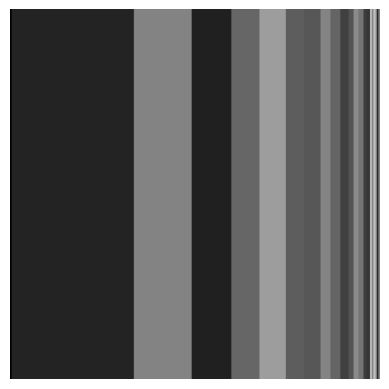

0     0.372596
1     0.340128
2     0.000000
3     0.521524
4     0.758184
5     0.286851
6     0.476241
7     0.402704
8     0.613687
9     0.507011
10    0.231468
11    0.552885
12    0.669275
13    0.080177
14    0.549509
15    0.550694
16    0.373695
17    0.089055
18    0.603416
19    0.263372
20    0.271854
Name: 9, dtype: float64
[[[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [154 154 154]
  [ 67  67  67]
  [ 69  69  69]]

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [154 154 154]
  [ 67  67  67]
  [ 69  69  69]]

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [154 154 154]
  [ 67  67  67]
  [ 69  69  69]]

 ...

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [154 154 154]
  [ 67  67  67]
  [ 69  69  69]]

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [154 154 154]
  [ 67  67  67]
  [ 69  69  69]]

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [154 154 154]
  [ 67  67  67]
  [ 69  69  69]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


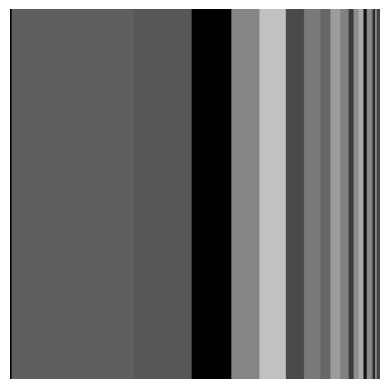

0     0.400292
1     0.222477
2     0.534082
3     0.060662
4     0.356822
5     0.208617
6     0.473189
7     0.355644
8     0.454424
9     0.367719
10    0.539481
11    0.492764
12    0.744959
13    0.355093
14    0.376485
15    0.396929
16    0.561325
17    0.537150
18    0.482174
19    0.336323
20    0.701639
Name: 10, dtype: float64
[[[  0   0   0]
  [102 102 102]
  [102 102 102]
  ...
  [123 123 123]
  [ 86  86  86]
  [179 179 179]]

 [[  0   0   0]
  [102 102 102]
  [102 102 102]
  ...
  [123 123 123]
  [ 86  86  86]
  [179 179 179]]

 [[  0   0   0]
  [102 102 102]
  [102 102 102]
  ...
  [123 123 123]
  [ 86  86  86]
  [179 179 179]]

 ...

 [[  0   0   0]
  [102 102 102]
  [102 102 102]
  ...
  [123 123 123]
  [ 86  86  86]
  [179 179 179]]

 [[  0   0   0]
  [102 102 102]
  [102 102 102]
  ...
  [123 123 123]
  [ 86  86  86]
  [179 179 179]]

 [[  0   0   0]
  [102 102 102]
  [102 102 102]
  ...
  [123 123 123]
  [ 86  86  86]
  [179 179 179]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


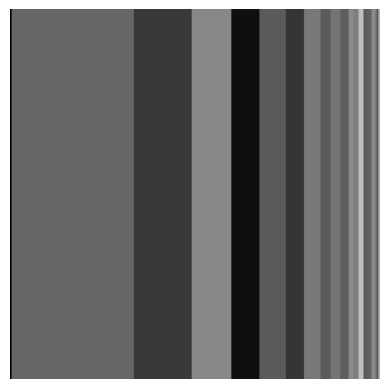

0     0.396591
1     0.640319
2     0.429386
3     0.571906
4     0.343643
5     0.374345
6     0.379862
7     0.241316
8     0.245424
9     0.560764
10    0.507231
11    0.338568
12    0.401532
13    0.386955
14    0.285695
15    0.489358
16    0.788415
17    0.139613
18    0.357759
19    0.314154
20    1.000000
Name: 11, dtype: float64
[[[  0   0   0]
  [101 101 101]
  [101 101 101]
  ...
  [ 91  91  91]
  [ 80  80  80]
  [255 255 255]]

 [[  0   0   0]
  [101 101 101]
  [101 101 101]
  ...
  [ 91  91  91]
  [ 80  80  80]
  [255 255 255]]

 [[  0   0   0]
  [101 101 101]
  [101 101 101]
  ...
  [ 91  91  91]
  [ 80  80  80]
  [255 255 255]]

 ...

 [[  0   0   0]
  [101 101 101]
  [101 101 101]
  ...
  [ 91  91  91]
  [ 80  80  80]
  [255 255 255]]

 [[  0   0   0]
  [101 101 101]
  [101 101 101]
  ...
  [ 91  91  91]
  [ 80  80  80]
  [255 255 255]]

 [[  0   0   0]
  [101 101 101]
  [101 101 101]
  ...
  [ 91  91  91]
  [ 80  80  80]
  [255 255 255]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


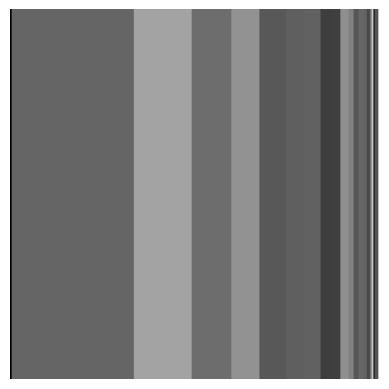

C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


0     0.488797
1     0.573338
2     0.282448
3     1.000000
4     0.581882
5     0.588596
6     0.459654
7     0.253431
8     0.316313
9     0.362352
10    0.617646
11    0.387231
12    0.488949
13    0.261912
14    0.344764
15    0.460379
16    0.899690
17    0.188587
18    0.545691
19    0.379494
20    0.619195
Name: 12, dtype: float64
[[[  0   0   0]
  [125 125 125]
  [125 125 125]
  ...
  [139 139 139]
  [ 97  97  97]
  [158 158 158]]

 [[  0   0   0]
  [125 125 125]
  [125 125 125]
  ...
  [139 139 139]
  [ 97  97  97]
  [158 158 158]]

 [[  0   0   0]
  [125 125 125]
  [125 125 125]
  ...
  [139 139 139]
  [ 97  97  97]
  [158 158 158]]

 ...

 [[  0   0   0]
  [125 125 125]
  [125 125 125]
  ...
  [139 139 139]
  [ 97  97  97]
  [158 158 158]]

 [[  0   0   0]
  [125 125 125]
  [125 125 125]
  ...
  [139 139 139]
  [ 97  97  97]
  [158 158 158]]

 [[  0   0   0]
  [125 125 125]
  [125 125 125]
  ...
  [139 139 139]
  [ 97  97  97]
  [158 158 158]]]


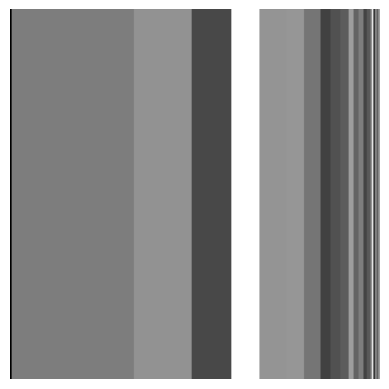

0     0.688519
1     1.000000
2     1.000000
3     0.233688
4     0.482349
5     0.632205
6     0.209309
7     0.520630
8     0.386101
9     0.000000
10    0.614717
11    0.485413
12    0.272715
13    0.000000
14    0.531843
15    0.573117
16    0.453175
17    0.159951
18    0.159065
19    0.496982
20    0.326149
Name: 13, dtype: float64
[[[  0   0   0]
  [176 176 176]
  [176 176 176]
  ...
  [ 41  41  41]
  [127 127 127]
  [ 83  83  83]]

 [[  0   0   0]
  [176 176 176]
  [176 176 176]
  ...
  [ 41  41  41]
  [127 127 127]
  [ 83  83  83]]

 [[  0   0   0]
  [176 176 176]
  [176 176 176]
  ...
  [ 41  41  41]
  [127 127 127]
  [ 83  83  83]]

 ...

 [[  0   0   0]
  [176 176 176]
  [176 176 176]
  ...
  [ 41  41  41]
  [127 127 127]
  [ 83  83  83]]

 [[  0   0   0]
  [176 176 176]
  [176 176 176]
  ...
  [ 41  41  41]
  [127 127 127]
  [ 83  83  83]]

 [[  0   0   0]
  [176 176 176]
  [176 176 176]
  ...
  [ 41  41  41]
  [127 127 127]
  [ 83  83  83]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


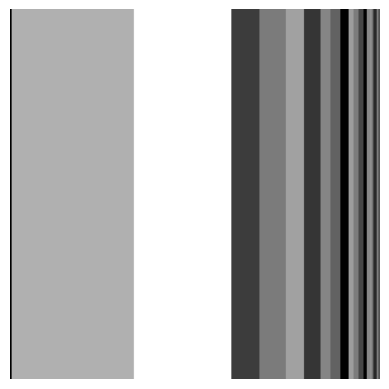

0     0.448885
1     0.346984
2     0.492966
3     0.000000
4     0.355999
5     0.363990
6     0.450159
7     0.342393
8     0.371229
9     0.478447
10    0.486798
11    0.553686
12    0.645563
13    0.425275
14    0.419344
15    0.552382
16    0.470341
17    0.179932
18    0.358196
19    0.061116
20    0.440658
Name: 14, dtype: float64


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


[[[  0   0   0]
  [114 114 114]
  [114 114 114]
  ...
  [ 91  91  91]
  [ 16  16  16]
  [112 112 112]]

 [[  0   0   0]
  [114 114 114]
  [114 114 114]
  ...
  [ 91  91  91]
  [ 16  16  16]
  [112 112 112]]

 [[  0   0   0]
  [114 114 114]
  [114 114 114]
  ...
  [ 91  91  91]
  [ 16  16  16]
  [112 112 112]]

 ...

 [[  0   0   0]
  [114 114 114]
  [114 114 114]
  ...
  [ 91  91  91]
  [ 16  16  16]
  [112 112 112]]

 [[  0   0   0]
  [114 114 114]
  [114 114 114]
  ...
  [ 91  91  91]
  [ 16  16  16]
  [112 112 112]]

 [[  0   0   0]
  [114 114 114]
  [114 114 114]
  ...
  [ 91  91  91]
  [ 16  16  16]
  [112 112 112]]]


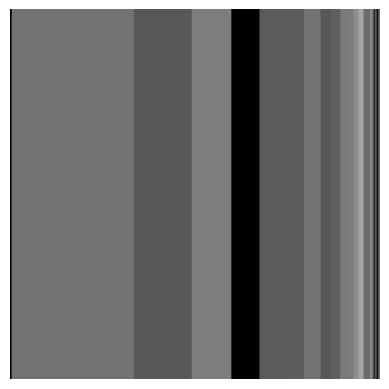

0     0.591053
1     0.440086
2     0.364467
3     0.569309
4     0.575867
5     0.539406
6     0.169655
7     0.295797
8     0.125246
9     0.625103
10    1.000000
11    0.297612
12    1.000000
13    0.163252
14    0.664998
15    0.163878
16    0.018202
17    0.960613
18    0.356502
19    0.223673
20    0.500895
Name: 15, dtype: float64
[[[  0   0   0]
  [151 151 151]
  [151 151 151]
  ...
  [ 91  91  91]
  [ 57  57  57]
  [128 128 128]]

 [[  0   0   0]
  [151 151 151]
  [151 151 151]
  ...
  [ 91  91  91]
  [ 57  57  57]
  [128 128 128]]

 [[  0   0   0]
  [151 151 151]
  [151 151 151]
  ...
  [ 91  91  91]
  [ 57  57  57]
  [128 128 128]]

 ...

 [[  0   0   0]
  [151 151 151]
  [151 151 151]
  ...
  [ 91  91  91]
  [ 57  57  57]
  [128 128 128]]

 [[  0   0   0]
  [151 151 151]
  [151 151 151]
  ...
  [ 91  91  91]
  [ 57  57  57]
  [128 128 128]]

 [[  0   0   0]
  [151 151 151]
  [151 151 151]
  ...
  [ 91  91  91]
  [ 57  57  57]
  [128 128 128]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


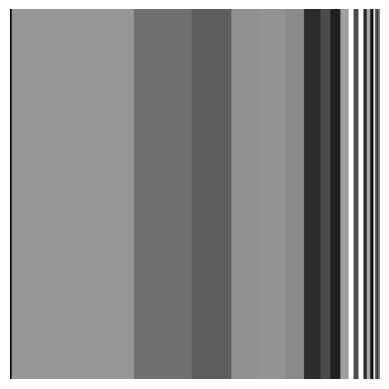

0     0.374174
1     0.666371
2     0.560117
3     0.393324
4     0.517633
5     0.623873
6     0.384411
7     0.406735
8     0.474716
9     0.324743
10    0.561800
11    0.334972
12    0.366129
13    0.535261
14    0.288351
15    0.708219
16    0.279368
17    0.432301
18    0.725934
19    0.329543
20    0.553590
Name: 16, dtype: float64
[[[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [185 185 185]
  [ 84  84  84]
  [141 141 141]]

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [185 185 185]
  [ 84  84  84]
  [141 141 141]]

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [185 185 185]
  [ 84  84  84]
  [141 141 141]]

 ...

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [185 185 185]
  [ 84  84  84]
  [141 141 141]]

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [185 185 185]
  [ 84  84  84]
  [141 141 141]]

 [[  0   0   0]
  [ 95  95  95]
  [ 95  95  95]
  ...
  [185 185 185]
  [ 84  84  84]
  [141 141 141]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


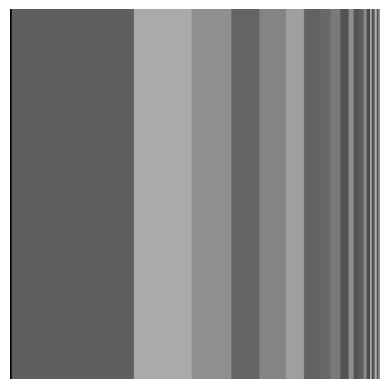

0     0.053375
1     0.380465
2     0.724529
3     0.379731
4     0.560866
5     0.266955
6     0.338313
7     0.263246
8     1.000000
9     0.884099
10    0.705523
11    0.393794
12    0.000000
13    0.037755
14    0.079605
15    0.157978
16    0.225372
17    0.362678
18    0.094879
19    0.328806
20    0.613729
Name: 17, dtype: float64
[[[  0   0   0]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 24  24  24]
  [ 84  84  84]
  [157 157 157]]

 [[  0   0   0]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 24  24  24]
  [ 84  84  84]
  [157 157 157]]

 [[  0   0   0]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 24  24  24]
  [ 84  84  84]
  [157 157 157]]

 ...

 [[  0   0   0]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 24  24  24]
  [ 84  84  84]
  [157 157 157]]

 [[  0   0   0]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 24  24  24]
  [ 84  84  84]
  [157 157 157]]

 [[  0   0   0]
  [ 14  14  14]
  [ 14  14  14]
  ...
  [ 24  24  24]
  [ 84  84  84]
  [157 157 157]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


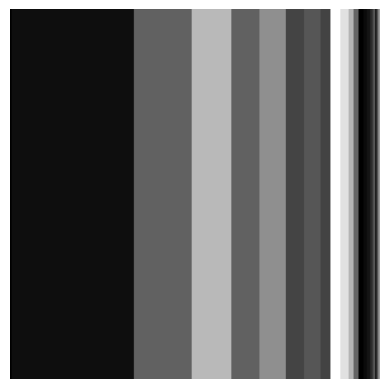

0     0.383577
1     0.000000
2     0.987250
3     0.764571
4     0.408991
5     0.767107
6     0.515272
7     0.679706
8     0.518548
9     0.275508
10    0.000000
11    0.099748
12    0.670215
13    0.306570
14    0.473337
15    0.436428
16    0.087765
17    0.254262
18    0.277763
19    0.127384
20    0.712291
Name: 18, dtype: float64
[[[  0   0   0]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 71  71  71]
  [ 32  32  32]
  [182 182 182]]

 [[  0   0   0]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 71  71  71]
  [ 32  32  32]
  [182 182 182]]

 [[  0   0   0]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 71  71  71]
  [ 32  32  32]
  [182 182 182]]

 ...

 [[  0   0   0]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 71  71  71]
  [ 32  32  32]
  [182 182 182]]

 [[  0   0   0]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 71  71  71]
  [ 32  32  32]
  [182 182 182]]

 [[  0   0   0]
  [ 98  98  98]
  [ 98  98  98]
  ...
  [ 71  71  71]
  [ 32  32  32]
  [182 182 182]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


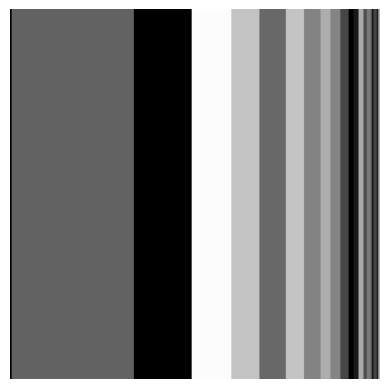

0     0.387526
1     0.455026
2     0.130433
3     0.451349
4     0.509198
5     0.419973
6     0.715238
7     1.000000
8     0.000000
9     0.463800
10    0.646061
11    0.637763
12    0.055055
13    0.597392
14    0.203971
15    0.003699
16    0.335908
17    0.396279
18    0.290581
19    0.318990
20    0.545396
Name: 19, dtype: float64
[[[  0   0   0]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 74  74  74]
  [ 81  81  81]
  [139 139 139]]

 [[  0   0   0]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 74  74  74]
  [ 81  81  81]
  [139 139 139]]

 [[  0   0   0]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 74  74  74]
  [ 81  81  81]
  [139 139 139]]

 ...

 [[  0   0   0]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 74  74  74]
  [ 81  81  81]
  [139 139 139]]

 [[  0   0   0]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 74  74  74]
  [ 81  81  81]
  [139 139 139]]

 [[  0   0   0]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 74  74  74]
  [ 81  81  81]
  [139 139 139]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


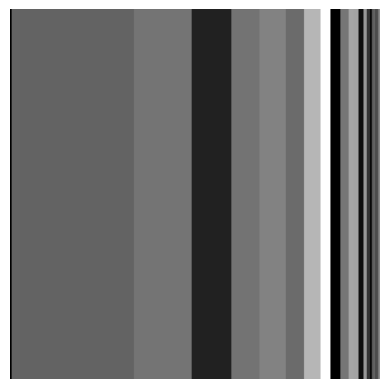

0     0.354786
1     0.465783
2     0.190628
3     0.475331
4     0.362944
5     0.405153
6     0.547923
7     0.358324
8     0.611804
9     0.369641
10    0.715516
11    0.430183
12    0.790735
13    0.877006
14    0.331583
15    0.793196
16    0.068783
17    0.178188
18    0.024553
19    1.000000
20    0.364009
Name: 20, dtype: float64
[[[  0   0   0]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [  6   6   6]
  [255 255 255]
  [ 93  93  93]]

 [[  0   0   0]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [  6   6   6]
  [255 255 255]
  [ 93  93  93]]

 [[  0   0   0]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [  6   6   6]
  [255 255 255]
  [ 93  93  93]]

 ...

 [[  0   0   0]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [  6   6   6]
  [255 255 255]
  [ 93  93  93]]

 [[  0   0   0]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [  6   6   6]
  [255 255 255]
  [ 93  93  93]]

 [[  0   0   0]
  [ 90  90  90]
  [ 90  90  90]
  ...
  [  6   6   6]
  [255 255 255]
  [ 93  93  93]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


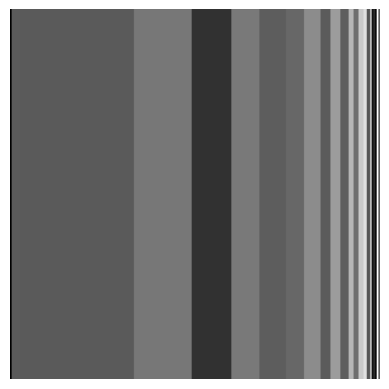

0     0.377543
1     0.568379
2     0.229929
3     0.862047
4     0.362478
5     0.423863
6     0.407492
7     0.337359
8     0.445424
9     0.601700
10    0.511995
11    0.017020
12    0.079710
13    0.458197
14    0.601536
15    0.571930
16    0.382394
17    0.580492
18    0.491147
19    0.290808
20    0.531674
Name: 21, dtype: float64
[[[  0   0   0]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [125 125 125]
  [ 74  74  74]
  [136 136 136]]

 [[  0   0   0]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [125 125 125]
  [ 74  74  74]
  [136 136 136]]

 [[  0   0   0]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [125 125 125]
  [ 74  74  74]
  [136 136 136]]

 ...

 [[  0   0   0]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [125 125 125]
  [ 74  74  74]
  [136 136 136]]

 [[  0   0   0]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [125 125 125]
  [ 74  74  74]
  [136 136 136]]

 [[  0   0   0]
  [ 96  96  96]
  [ 96  96  96]
  ...
  [125 125 125]
  [ 74  74  74]
  [136 136 136]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


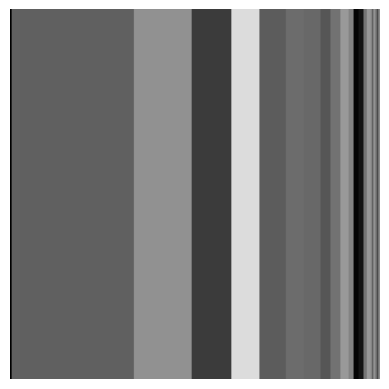

0     0.434058
1     0.250802
2     0.036593
3     0.065830
4     0.548424
5     1.000000
6     0.339163
7     0.077719
8     0.589570
9     0.254622
10    0.423279
11    0.226434
12    0.221187
13    0.677172
14    0.503749
15    0.000000
16    0.532613
17    0.237819
18    0.566483
19    0.564084
20    0.523387
Name: 22, dtype: float64
[[[  0   0   0]
  [111 111 111]
  [111 111 111]
  ...
  [144 144 144]
  [144 144 144]
  [133 133 133]]

 [[  0   0   0]
  [111 111 111]
  [111 111 111]
  ...
  [144 144 144]
  [144 144 144]
  [133 133 133]]

 [[  0   0   0]
  [111 111 111]
  [111 111 111]
  ...
  [144 144 144]
  [144 144 144]
  [133 133 133]]

 ...

 [[  0   0   0]
  [111 111 111]
  [111 111 111]
  ...
  [144 144 144]
  [144 144 144]
  [133 133 133]]

 [[  0   0   0]
  [111 111 111]
  [111 111 111]
  ...
  [144 144 144]
  [144 144 144]
  [133 133 133]]

 [[  0   0   0]
  [111 111 111]
  [111 111 111]
  ...
  [144 144 144]
  [144 144 144]
  [133 133 133]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


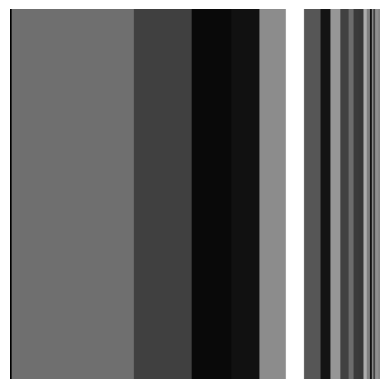

0     0.381801
1     0.415587
2     0.282815
3     0.522587
4     0.294454
5     0.382372
6     0.464337
7     0.197369
8     0.308179
9     0.512099
10    0.420616
11    0.447783
12    0.410639
13    0.136741
14    0.527489
15    0.621197
16    0.520142
17    0.132703
18    0.469795
19    0.007809
20    0.293526
Name: 23, dtype: float64
[[[  0   0   0]
  [ 97  97  97]
  [ 97  97  97]
  ...
  [120 120 120]
  [  2   2   2]
  [ 75  75  75]]

 [[  0   0   0]
  [ 97  97  97]
  [ 97  97  97]
  ...
  [120 120 120]
  [  2   2   2]
  [ 75  75  75]]

 [[  0   0   0]
  [ 97  97  97]
  [ 97  97  97]
  ...
  [120 120 120]
  [  2   2   2]
  [ 75  75  75]]

 ...

 [[  0   0   0]
  [ 97  97  97]
  [ 97  97  97]
  ...
  [120 120 120]
  [  2   2   2]
  [ 75  75  75]]

 [[  0   0   0]
  [ 97  97  97]
  [ 97  97  97]
  ...
  [120 120 120]
  [  2   2   2]
  [ 75  75  75]]

 [[  0   0   0]
  [ 97  97  97]
  [ 97  97  97]
  ...
  [120 120 120]
  [  2   2   2]
  [ 75  75  75]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


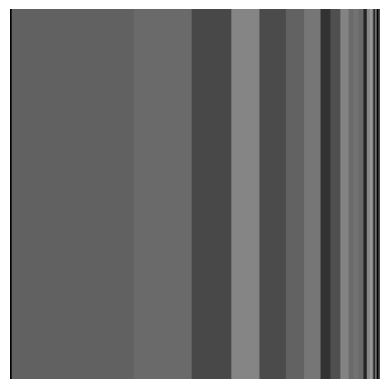

C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


0     0.696859
1     0.553258
2     0.308569
3     0.387378
4     0.183622
5     0.000000
6     0.240668
7     0.604518
8     0.642690
9     0.360008
10    0.552646
11    0.000000
12    0.303630
13    0.719789
14    0.866559
15    0.608446
16    0.346388
17    0.214051
18    0.323714
19    0.044354
20    0.588355
Name: 24, dtype: float64
[[[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [ 83  83  83]
  [ 11  11  11]
  [150 150 150]]

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [ 83  83  83]
  [ 11  11  11]
  [150 150 150]]

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [ 83  83  83]
  [ 11  11  11]
  [150 150 150]]

 ...

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [ 83  83  83]
  [ 11  11  11]
  [150 150 150]]

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [ 83  83  83]
  [ 11  11  11]
  [150 150 150]]

 [[  0   0   0]
  [178 178 178]
  [178 178 178]
  ...
  [ 83  83  83]
  [ 11  11  11]
  [150 150 150]]]


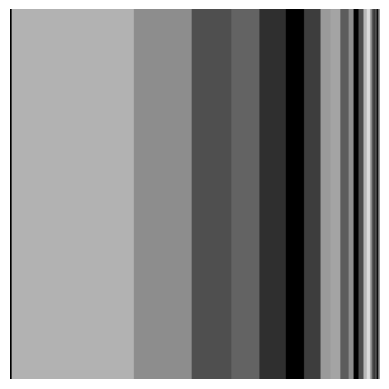

0     1.000000
1     0.144871
2     0.246153
3     0.499126
4     0.304625
5     0.139715
6     0.099456
7     0.350281
8     0.458675
9     0.181235
10    0.121694
11    0.586044
12    0.159557
13    0.213763
14    0.455334
15    0.317967
16    0.484946
17    0.808678
18    0.356316
19    0.789674
20    0.601272
Name: 25, dtype: float64
[[[  0   0   0]
  [255 255 255]
  [255 255 255]
  ...
  [ 91  91  91]
  [201 201 201]
  [153 153 153]]

 [[  0   0   0]
  [255 255 255]
  [255 255 255]
  ...
  [ 91  91  91]
  [201 201 201]
  [153 153 153]]

 [[  0   0   0]
  [255 255 255]
  [255 255 255]
  ...
  [ 91  91  91]
  [201 201 201]
  [153 153 153]]

 ...

 [[  0   0   0]
  [255 255 255]
  [255 255 255]
  ...
  [ 91  91  91]
  [201 201 201]
  [153 153 153]]

 [[  0   0   0]
  [255 255 255]
  [255 255 255]
  ...
  [ 91  91  91]
  [201 201 201]
  [153 153 153]]

 [[  0   0   0]
  [255 255 255]
  [255 255 255]
  ...
  [ 91  91  91]
  [201 201 201]
  [153 153 153]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


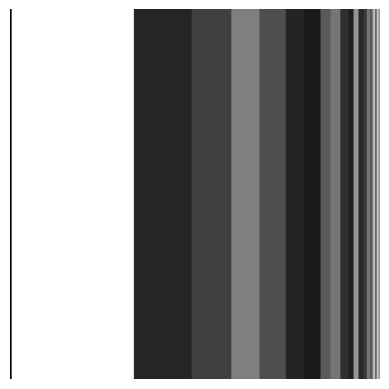

0     0.648893
1     0.407529
2     0.505353
3     0.360076
4     0.546208
5     0.542711
6     0.370240
7     0.556848
8     0.707515
9     0.515038
10    0.660035
11    0.394374
12    0.210155
13    0.483412
14    0.575085
15    0.352435
16    0.345049
17    0.489277
18    1.000000
19    0.000000
20    0.000000
Name: 26, dtype: float64


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


[[[  0   0   0]
  [165 165 165]
  [165 165 165]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [165 165 165]
  [165 165 165]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [165 165 165]
  [165 165 165]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 ...

 [[  0   0   0]
  [165 165 165]
  [165 165 165]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [165 165 165]
  [165 165 165]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [165 165 165]
  [165 165 165]
  ...
  [255 255 255]
  [  0   0   0]
  [  0   0   0]]]


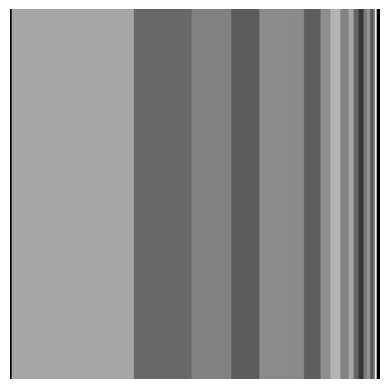

0     0.870016
1     0.719888
2     0.702687
3     0.468848
4     0.865094
5     0.165342
6     1.000000
7     0.000000
8     0.439567
9     0.252661
10    0.279440
11    0.280416
12    0.390857
13    0.554654
14    0.407439
15    0.179983
16    0.264534
17    0.667616
18    0.341484
19    0.159858
20    0.413149
Name: 27, dtype: float64
[[[  0   0   0]
  [222 222 222]
  [222 222 222]
  ...
  [ 87  87  87]
  [ 41  41  41]
  [105 105 105]]

 [[  0   0   0]
  [222 222 222]
  [222 222 222]
  ...
  [ 87  87  87]
  [ 41  41  41]
  [105 105 105]]

 [[  0   0   0]
  [222 222 222]
  [222 222 222]
  ...
  [ 87  87  87]
  [ 41  41  41]
  [105 105 105]]

 ...

 [[  0   0   0]
  [222 222 222]
  [222 222 222]
  ...
  [ 87  87  87]
  [ 41  41  41]
  [105 105 105]]

 [[  0   0   0]
  [222 222 222]
  [222 222 222]
  ...
  [ 87  87  87]
  [ 41  41  41]
  [105 105 105]]

 [[  0   0   0]
  [222 222 222]
  [222 222 222]
  ...
  [ 87  87  87]
  [ 41  41  41]
  [105 105 105]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


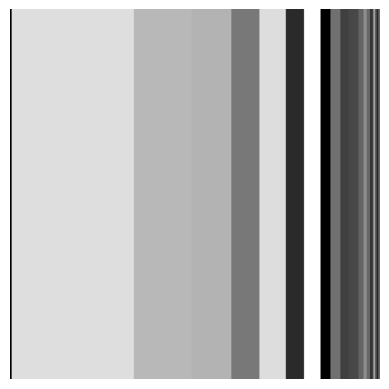

0     0.485484
1     0.335657
2     0.338768
3     0.517830
4     0.000000
5     0.426346
6     0.526559
7     0.169715
8     0.356530
9     0.418464
10    0.572247
11    0.468151
12    0.276625
13    0.410163
14    0.324416
15    0.763832
16    0.204640
17    0.208518
18    0.429078
19    0.098783
20    0.224778
Name: 28, dtype: float64
[[[  0   0   0]
  [124 124 124]
  [124 124 124]
  ...
  [109 109 109]
  [ 25  25  25]
  [ 57  57  57]]

 [[  0   0   0]
  [124 124 124]
  [124 124 124]
  ...
  [109 109 109]
  [ 25  25  25]
  [ 57  57  57]]

 [[  0   0   0]
  [124 124 124]
  [124 124 124]
  ...
  [109 109 109]
  [ 25  25  25]
  [ 57  57  57]]

 ...

 [[  0   0   0]
  [124 124 124]
  [124 124 124]
  ...
  [109 109 109]
  [ 25  25  25]
  [ 57  57  57]]

 [[  0   0   0]
  [124 124 124]
  [124 124 124]
  ...
  [109 109 109]
  [ 25  25  25]
  [ 57  57  57]]

 [[  0   0   0]
  [124 124 124]
  [124 124 124]
  ...
  [109 109 109]
  [ 25  25  25]
  [ 57  57  57]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


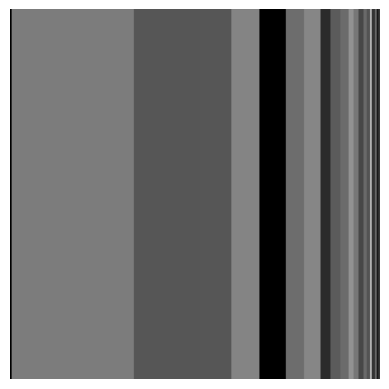

0     0.253839
1     0.291792
2     0.811799
3     0.519136
4     0.459834
5     0.407361
6     0.548898
7     0.440967
8     0.542363
9     0.413202
10    0.523996
11    0.602700
12    0.542903
13    0.417136
14    0.394123
15    0.630770
16    0.828742
17    0.666105
18    0.356478
19    0.417201
20    0.210812
Name: 29, dtype: float64
[[[  0   0   0]
  [ 65  65  65]
  [ 65  65  65]
  ...
  [ 91  91  91]
  [106 106 106]
  [ 54  54  54]]

 [[  0   0   0]
  [ 65  65  65]
  [ 65  65  65]
  ...
  [ 91  91  91]
  [106 106 106]
  [ 54  54  54]]

 [[  0   0   0]
  [ 65  65  65]
  [ 65  65  65]
  ...
  [ 91  91  91]
  [106 106 106]
  [ 54  54  54]]

 ...

 [[  0   0   0]
  [ 65  65  65]
  [ 65  65  65]
  ...
  [ 91  91  91]
  [106 106 106]
  [ 54  54  54]]

 [[  0   0   0]
  [ 65  65  65]
  [ 65  65  65]
  ...
  [ 91  91  91]
  [106 106 106]
  [ 54  54  54]]

 [[  0   0   0]
  [ 65  65  65]
  [ 65  65  65]
  ...
  [ 91  91  91]
  [106 106 106]
  [ 54  54  54]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


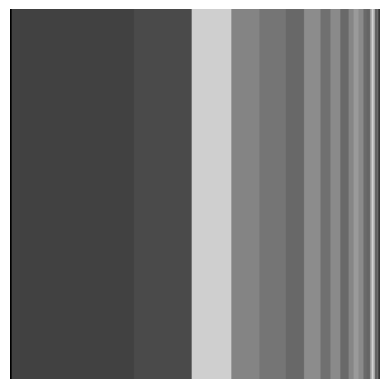

0     0.509381
1     0.585401
2     0.473759
3     0.502491
4     0.622707
5     0.196221
6     0.518248
7     0.598965
8     0.848335
9     0.375430
10    0.658577
11    0.382314
12    0.797351
13    0.320894
14    0.663818
15    0.101599
16    0.604093
17    0.000000
18    0.930805
19    0.571198
20    0.740953
Name: 30, dtype: float64


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


[[[  0   0   0]
  [130 130 130]
  [130 130 130]
  ...
  [237 237 237]
  [146 146 146]
  [189 189 189]]

 [[  0   0   0]
  [130 130 130]
  [130 130 130]
  ...
  [237 237 237]
  [146 146 146]
  [189 189 189]]

 [[  0   0   0]
  [130 130 130]
  [130 130 130]
  ...
  [237 237 237]
  [146 146 146]
  [189 189 189]]

 ...

 [[  0   0   0]
  [130 130 130]
  [130 130 130]
  ...
  [237 237 237]
  [146 146 146]
  [189 189 189]]

 [[  0   0   0]
  [130 130 130]
  [130 130 130]
  ...
  [237 237 237]
  [146 146 146]
  [189 189 189]]

 [[  0   0   0]
  [130 130 130]
  [130 130 130]
  ...
  [237 237 237]
  [146 146 146]
  [189 189 189]]]


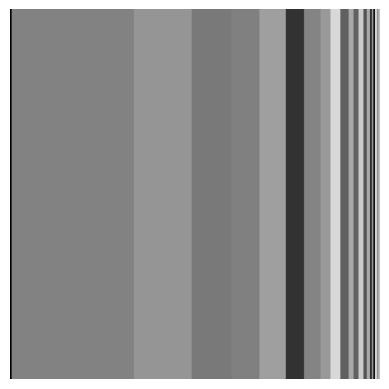

0     0.000000
1     0.646975
2     0.662462
3     0.266458
4     0.415171
5     0.457727
6     0.452440
7     0.387714
8     0.543381
9     0.471729
10    0.373413
11    0.380102
12    0.398604
13    0.715653
14    0.593991
15    0.770157
16    0.512418
17    1.000000
18    0.728969
19    0.380795
20    0.809812
Name: 31, dtype: float64
[[[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [186 186 186]
  [ 97  97  97]
  [207 207 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [186 186 186]
  [ 97  97  97]
  [207 207 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [186 186 186]
  [ 97  97  97]
  [207 207 207]]

 ...

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [186 186 186]
  [ 97  97  97]
  [207 207 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [186 186 186]
  [ 97  97  97]
  [207 207 207]]

 [[  0   0   0]
  [  0   0   0]
  [  0   0   0]
  ...
  [186 186 186]
  [ 97  97  97]
  [207 207 207]]]


C:\Users\mlomm\AppData\Local\Temp\ipykernel_12968\2828309294.py:23: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dfi[s]= pd.DataFrame(img)


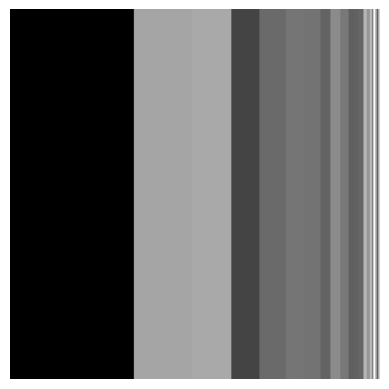

In [ ]:
for x in range(0,len(T_pca3)):
    row_name = 'row'+str(x)
    yt = [element for row in ytrain.values for element in row]
    yt = yt[x]
    rowt =  T_pca3.iloc[x]
    print(rowt)
    b = rowtoimage(rowt,evr['pixels'],x,yt)
    #print(b)
    plt.imshow(b)
    plt.axis('off')
    plt.show()
    
    #array = b.values.astype(np.uint8)
    #image = Image.fromarray(b)
    # Bild als PNG speichern
    #b.save(str(x)+'.png')
   

In [ ]:
b



In [ ]:
yl=[]
for x in range(0,len(df_trainN)):
    yl= yl.append(x)
    #y=yl[x]
    print(str(x)+str(y))
    row = df_trainN.iloc[x]
    row = row[:-1]
    #new_image = rowtoimage(row,evr['pixels'],x,y)
    #print(row,evr['pixels'],x,y)

AttributeError: 'DataFrame' object has no attribute 'append'

In [ ]:
print(ytrain)
XtrainN.head(3)

             y
measurement   
21           0
17           1
36           0
31           0
33           1
11           1
28           1
1            1
29           1
40           0
39           0
13           0
14           1
24           1
27           1
8            1
22           0
2            0
30           1
35           0
34           0
38           0
5            0
26           1
0            1
3            1
23           1
7            0
32           0
37           0
20           1
15           0


,p0,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p78,p79,p80,p81,p82,p83,p84,p85,p86,p87
measurement,,,,,,,,,,,,,,,,,,,,,
21,11.000000,-28.333333,-5.000000,12.000000,1.333333,0.333333,16.333333,10.333333,75.000000,66.666667,...,-5.666667,-4.000000,-5.666667,1.666667,-0.333333,28.333333,269.666667,2164.333333,2890.000000,1.666667
17,9.666667,-7.333333,15.000000,3.000000,-3.666667,-3.000000,1.000000,1.333333,-12.333333,-22.333333,...,-19.666667,-2.666667,-10.000000,-6.000000,-2.666667,10.333333,37.000000,-123.333333,84.666667,-3.333333
36,-6.333333,-22.000000,-8.666667,2.333333,-2.000000,-1.333333,0.333333,0.333333,-8.333333,-23.000000,...,-28.666667,7.333333,4.333333,-3.666667,0.666667,-28.000000,18.000000,-460.000000,-190.666667,0.333333


In [ ]:
#take 1 row as an image

## image generation

In [ ]:
image_template = np.zeros(shape=(224,224,3), dtype='uint8')

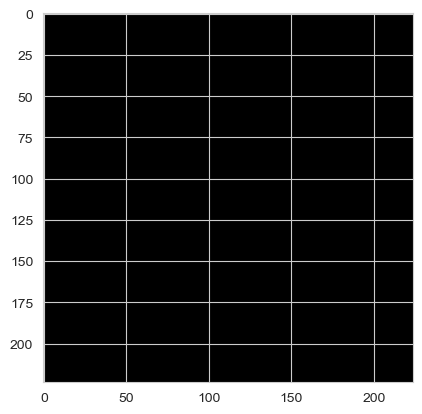

In [ ]:
plt.imshow(image_template)

In [ ]:
X = dfN.drop('y', axis=1) #remove target from train data
y = dfN['y'] #target

pca = PCA()
pca.fit(XtrainN)
principal_components = pca.components_
number_of_pcs = principal_components.shape[0]
number_of_pcs
# feature_space_dimensionality
principal_components.shape[1]
pc_df = pd.DataFrame(
    dict(enumerate(principal_components))
)
pc_df.rename(
    index = lambda x: X.columns[x],
    columns = lambda x: 'pc'+str(x+1),
    inplace = True
)
pc_df

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32
p0,0.000830,0.003693,0.001240,0.005083,-0.000019,0.012535,0.023091,0.013541,-0.035009,-0.023618,...,-0.071474,-0.075875,-0.013854,-0.030138,0.046789,0.345091,0.044221,0.064626,0.025593,-0.633005
p1,0.005052,0.002397,-0.050790,-0.003116,-0.021734,-0.022088,-0.008231,-0.005705,-0.045111,0.048188,...,0.183430,-0.112686,0.088006,0.346756,0.174601,0.096626,-0.304086,-0.256298,-0.046562,0.108102
p2,-0.000278,-0.003279,0.001932,0.001991,0.000821,-0.005588,0.004957,-0.004615,-0.023907,0.000268,...,-0.008414,-0.052668,0.126447,-0.092345,0.046334,-0.095069,0.005132,0.056305,-0.176901,-0.361064
p3,-0.000202,0.001092,-0.000056,-0.000155,0.000808,-0.001440,0.000726,-0.002730,0.002638,-0.007912,...,-0.050179,0.089491,-0.207053,-0.121779,-0.174889,0.060722,0.022973,-0.039497,-0.106711,0.137311
p4,-0.001087,0.000061,0.000407,0.003420,-0.003046,0.001317,-0.003769,-0.003494,-0.002649,-0.003795,...,-0.018655,-0.030843,0.023699,-0.022572,0.117792,0.017414,0.044872,-0.010735,-0.024000,0.157336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
p83,-0.006104,0.007461,0.014969,-0.003459,-0.007923,-0.013710,-0.020736,0.039930,-0.006881,-0.030574,...,-0.191817,-0.077658,-0.004004,-0.136693,0.411852,-0.089227,0.092812,-0.017754,-0.158487,0.029212
p84,-0.043214,0.041772,0.036098,0.002511,-0.007074,-0.091329,-0.044360,-0.012069,-0.019275,0.007467,...,0.124624,0.107440,-0.016994,-0.066468,-0.005337,-0.093203,-0.019262,-0.047690,0.087720,0.083937
p85,-0.359860,0.454187,0.320522,-0.644338,-0.302000,-0.106314,0.028590,-0.111159,-0.020091,0.013649,...,-0.009429,-0.033081,-0.014958,-0.051972,-0.011175,-0.010148,-0.008588,0.008173,0.010171,0.007514
p86,-0.497081,0.336226,-0.269737,0.123150,0.563821,-0.178387,-0.348446,0.112835,-0.195022,0.094526,...,0.021002,-0.006960,-0.024949,0.003240,-0.002541,-0.004819,0.027213,0.028035,-0.011746,-0.009771


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1))
pc_df_sc = scaler.fit_transform(pc_df)
pc_df_sc = pd.DataFrame(pc_df_sc, columns=pc_df.columns)
pc_df_sc

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,...,pc23,pc24,pc25,pc26,pc27,pc28,pc29,pc30,pc31,pc32
0,0.895925,0.627144,0.685847,0.529337,0.391662,0.529523,0.449549,0.590866,0.668596,0.278523,...,0.495644,0.503446,0.491740,0.421820,0.386666,0.911182,0.623942,0.467638,0.600222,0.000000
1,0.901991,0.626071,0.634653,0.522655,0.368233,0.492252,0.420059,0.571636,0.656754,0.345714,...,0.817888,0.450916,0.668049,1.000000,0.601400,0.533090,0.141387,0.079275,0.448695,0.843202
2,0.894333,0.621373,0.686529,0.526817,0.392569,0.510014,0.432476,0.572724,0.681610,0.300874,...,0.575362,0.536563,0.734586,0.326392,0.385901,0.241383,0.569786,0.457568,0.174981,0.309404
3,0.894442,0.624991,0.684572,0.525068,0.392555,0.514479,0.428492,0.574607,0.712729,0.293220,...,0.522564,0.739424,0.157331,0.281239,0.014229,0.478453,0.594504,0.341636,0.322381,0.876435
4,0.893169,0.624138,0.685028,0.527982,0.388397,0.517448,0.424261,0.573844,0.706531,0.297072,...,0.562417,0.567707,0.556740,0.433428,0.505957,0.412550,0.624844,0.376441,0.496076,0.899218
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,0.885962,0.630263,0.699356,0.522375,0.383134,0.501271,0.408285,0.617235,0.701570,0.272014,...,0.343509,0.500901,0.508789,0.258359,1.000000,0.250274,0.691260,0.367947,0.213652,0.753444
84,0.832640,0.658660,0.720146,0.527241,0.384051,0.417717,0.386042,0.565276,0.687041,0.307610,...,0.743546,0.765037,0.486305,0.366088,0.299090,0.244223,0.535990,0.331721,0.730688,0.815709
85,0.377666,1.000000,1.000000,0.000000,0.065849,0.401586,0.454727,0.466263,0.686085,0.313394,...,0.574080,0.564514,0.489828,0.388326,0.289282,0.370610,0.550779,0.399323,0.567836,0.728757
86,0.180500,0.902368,0.419223,0.625573,1.000000,0.324002,0.099738,0.690084,0.481016,0.389074,...,0.612550,0.601789,0.472535,0.473025,0.303787,0.378719,0.600377,0.423358,0.521810,0.709091


In [ ]:
# orthogonality
pc1 = pc_df['pc1']
pc2 = pc_df['pc2']

pc1.dot(pc2)

-1.531389511219268e-16

In [ ]:
pc1

p0     0.000830
p1     0.005052
p2    -0.000278
p3    -0.000202
p4    -0.001087
         ...   
p83   -0.006104
p84   -0.043214
p85   -0.359860
p86   -0.497081
p87   -0.000580
Name: pc1, Length: 88, dtype: float64

In [ ]:
# normalization
np.linalg.norm(pc1)

# explained variance ratio
evr = pd.DataFrame(
    data=pca.explained_variance_ratio_,
    index=pc_df.columns,
    columns=['explained_variance_ratio']
)
evr

,explained_variance_ratio
pc1,8.341204e-01
pc2,7.903335e-02
pc3,2.794895e-02
pc4,2.247636e-02
pc5,1.523218e-02
pc6,7.154406e-03
pc7,5.062410e-03
pc8,3.156832e-03
pc9,1.754685e-03
pc10,1.235186e-03


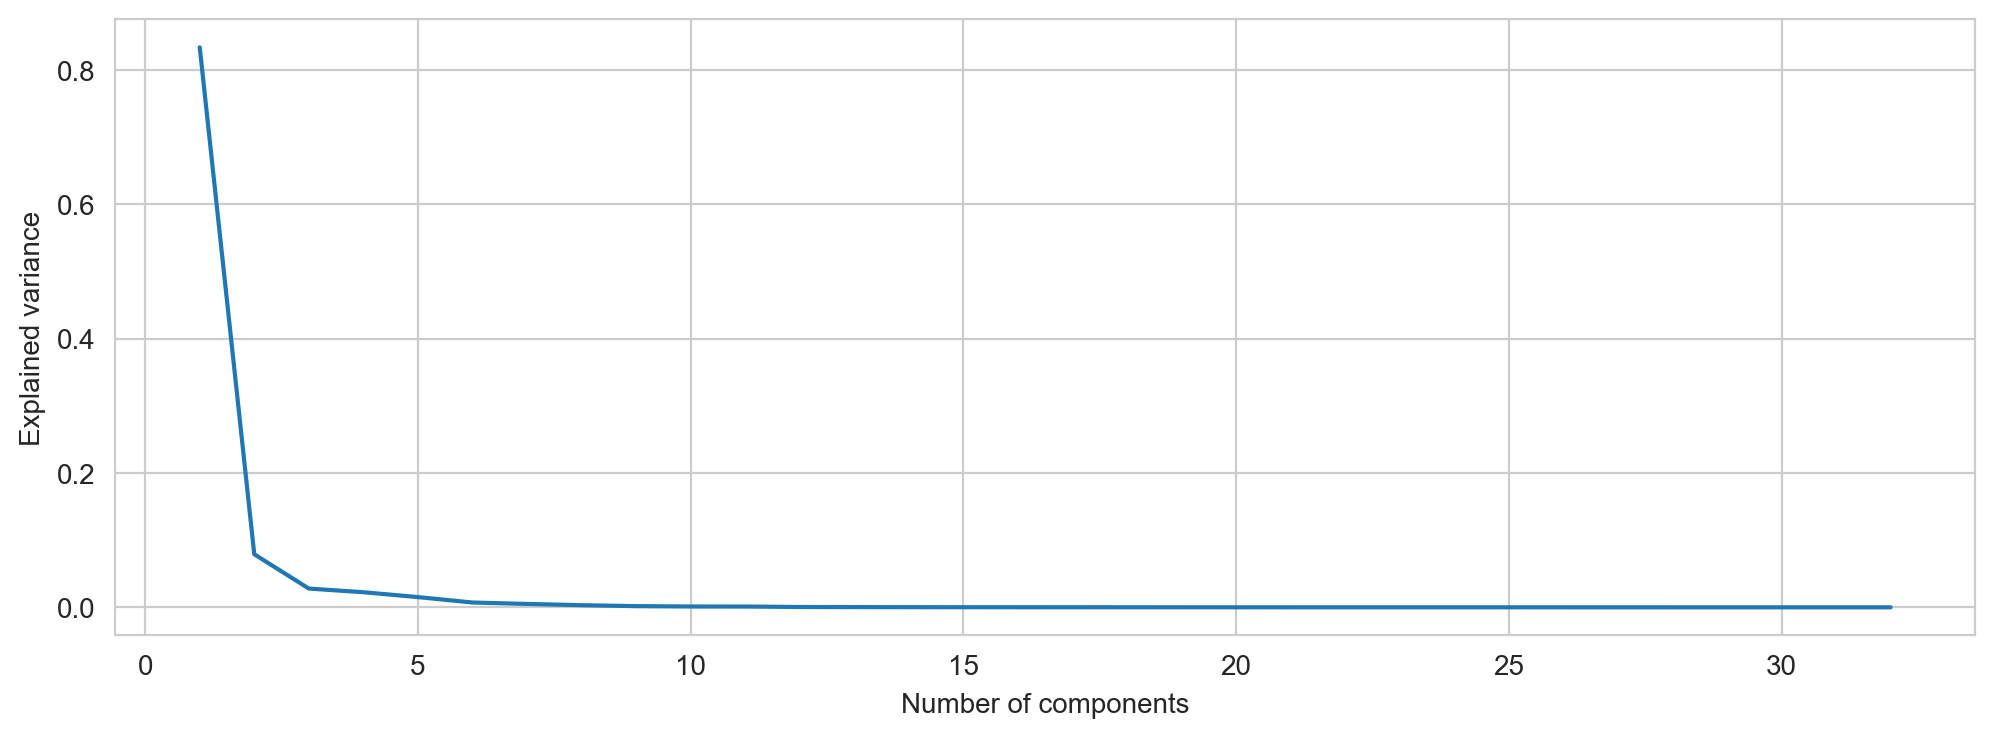

In [ ]:
plt.figure(figsize=(12,4), dpi=200)
sns.lineplot(
    x=list(range(1, number_of_pcs+1)),
    y=evr['explained_variance_ratio']
)
plt.xlabel('Number of components')
plt.ylabel('Explained variance');

## Augmentation

In [ ]:
augmentation = (
                #False #Activate for raw data
                True    #Activate for more data generation (Augmentation)
                )

if augmentation:
    # TRAIN/TEST Split before aufmentation
    #X = df.drop('y', axis=1) #remove target from train data
    #y = df['y'] #target

    # The function train_test_split() randomly separate the data. 
    #Xtrain, Xtest, ytrain, ytest = \
    #train_test_split(X, y, test_size=0.17,random_state=100, stratify=y)
    #df_train = Xtrain.merge(ytrain, left_index=True, right_index=True, how='left')

    ############################################################################################
    # Define augmentation parameters
    augmentation_factor = 6  # Number of augmented samples to generate
    augmentation_std = 0.01  # Standard deviation for data perturbation
    ############################################################################################

    # Perform data augmentation
    augmented_data = []
    for _, row in df_trainN.iterrows():
        for _ in range(augmentation_factor):
            augmented_row = row + np.random.normal(scale=augmentation_std, size=len(row))
            augmented_data.append(augmented_row)

    # Convert augmented data to a new DataFrame
    augmented_df = pd.DataFrame(augmented_data, columns=df_trainN.columns)

    # Combine original and augmented data
    combined_df = pd.concat([df_trainN, augmented_df], ignore_index=True)

    #round y to 0/1
    combined_df['y'] = combined_df['y'].round()
    combined_df['y'] = combined_df['y'].astype(int)

    # Display the combined DataFrame
    print((combined_df))#, index= dfN.columns)) #for showing results

else:
    print('no augmentation applied')


            p0         p1         p2         p3        p4        p5  \
0    11.000000 -28.333333  -5.000000  12.000000  1.333333  0.333333   
1     9.666667  -7.333333  15.000000   3.000000 -3.666667 -3.000000   
2    -6.333333 -22.000000  -8.666667   2.333333 -2.000000 -1.333333   
3    -2.000000  -4.666667  13.666667  -6.333333 -6.000000 -6.333333   
4    12.666667 -60.333333  -2.333333  -4.333333  0.333333 -3.333333   
..         ...        ...        ...        ...       ...       ...   
219  -6.338432  -8.308692  -3.320117  -5.012634 -5.352883 -6.693809   
220  -6.337494  -8.325032  -3.347820  -4.988851 -5.341081 -6.660041   
221  -6.339624  -8.341206  -3.348850  -4.986682 -5.320167 -6.665782   
222  -6.329670  -8.349831  -3.349571  -4.984579 -5.318516 -6.665227   
223  -6.360096  -8.339974  -3.316886  -5.004378 -5.335325 -6.670212   

            p6         p7         p8         p9  ...       p79        p80  \
0    16.333333  10.333333  75.000000  66.666667  ... -4.000000  -5.666

In [ ]:
combined_df['y']

0      0
1      1
2      0
3      0
4      1
      ..
219    0
220    0
221    0
222    0
223    0
Name: y, Length: 224, dtype: int32